<div style="text-align: center; background-color: cream;">
  <h1 style="color: #4B0082, font-family: 'Merriweather', serif;">Project: Investigation of a Collection of 10,000 Movies in The Movie Database (TMDB)</h1>
    <br>
    <b>By Buhari Shehu (The Datavestigator)</b>
</div>

<img src="movie.png" alt="movies pic" style="max-width: 100%;">
<br>
<center>Photo by Moview</center>


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
The movie industry is a thriving billion-dollar sector that consistently generates substantial revenue for its stakeholders. Despite debates suggesting its decline, it is essential to examine the industry objectively. To address any concerns and provide valuable insights to prospective investors, this project delves into a comprehensive analysis of 55 years' worth of movie metadata from TMDb. By meticulously studying this extensive dataset, we aim to uncover trends and patterns that shed light on the industry's revenue generation potential. The project will investigate the *`Annual Revenue Growth`* of the movie industry and the relationships between *`popularity, runtime, average votes and revenue generation`*. The outcomes of this analysis will serve as a valuable guide for investors, empowering them to make informed decisions about investing in the movie industry.

### Dataset Description
The dataset investigated in this project is a collection of features of about 10,000 movies in The Movie Database (TMDb). [1](https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub?embedded=True) TMDb is built by community and for community since 2008 and there are currently more than 400,000 developers using the metadata. [2](https://www.themoviedb.org/about)
The database consists of the following features:
- `id`: this is the TMDb unique movie identifier
- `imdb_id`: this is the iMDb unique movie identifier
- `popularity`: a metric that measures the acceptance of a movie by the viewers
- `budge`t: estimate of the total amount of money earmarked for the movie
- `revenue`: the total amount of money realized from selling the movie
- `original_title`: the movie title
- `cast`: list of actors in the movie [3](https://dictionary.cambridge.org/dictionary/english/cast#:~:text=cast%20noun%20%28ACTORS%29%20B2%20%5B%20C%2C%20%2B%20sing%2Fpl,actors%20who%20were%20not%20playing%20the%20main%20parts%29.)
- `homepage`: the movie homepage
- `director`: the movie director
- `tagline`: a catchphrase for the movie advert
- `keywords`: words used in indexing and ranking movies in search results
- `overview`: high-level summary of the movie story line
- `runtime`: movie duration [4](https://www.merriam-webster.com/dictionary/running%20time#:~:text=Definition%20of%20running%20time%20%3A%20the%20duration%20of,recording%20Examples%20of%20running%20time%20in%20a%20Sentence)
- `genres`: movie category [5](https://www.studiobinder.com/blog/movie-genres-list/)
- `production_companies`: the company that produced the movie
- `release_date`: movie release date
- `vote_count`: number of votes
- `vote_average`: average votes
- `release_year`: movie release year
- `budget_adj`: adjusted budget taking inflation into account
- `revenue_adj`: adjusted revenue taking inflation into account

### Importing Dependencies

In [2]:
# importing the necessary packages
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

<a id='wrangling'></a>
## Data Wrangling
In this section, we will carefully examine the dataset to identify and resolve errors, inconsistencies, missing values, and duplicate entries. Our aim is to ensure that the dataset is accurate, consistent, and complete, making it suitable for analysis.

In [3]:
# loading the data
movies_df = pd.read_csv('tmdb-movies.csv')

In [4]:
# first five records in the dataset
movies_df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


From this we can observe that:
- the dataset consists of 21 features
- a movie can fall under more than one genres 
- and two or more production companies do collaborate to produce movies.

**Let's check the number of records in the dataset.**

In [4]:
# checking the size of the dataset
movies_df.shape

(10866, 21)

We can see that there are 10866 entries in the database. 

**Let's investigate the metadata of the features.**

In [5]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

We can see from the above that we have:
- three data types: ***float64, int64, object***
- the features: ***imdb_id, cast, homepage, director, tagline, keywords, overview, genres, and production_companies*** all have missing values.

**Let's check the summary statics of the numerical features of the dataset.**

In [6]:
movies_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


From the above summary statistics we note that:
- ***popularity, runtime, and vote_count*** have outliers because their maximum values far outpass their interquartile ranges.
- the record is for 55 year duration (1960-2015)
- more than 50% of ***budget, revenue, budget_adj and revenue_adj*** contain zero values. 


### Data Cleaning
In this section, the data will be cleaned prior to analysis. Thus:
- as noted above the features: ***imdb_id, cast, homepage, director, tagline, keywords, overview, genres, and production_companies*** have missing values. However, the missing values are not going to be imputed because they are not in our features of interest. 
- The outliers will be left intact because they are possible values. 
- The features ***revenue_adj and vote_average*** will be renamed to more readable features
- a function that will drop rows equal to some certain values will be defined for code reusability
- zero revenue and budget are not common values but it may seem irrational to replace these values with *mean, median or mode*. Thus, all records with the value of zero in ***revenue_adj*** , which is our target feature, will be dropped using the function mentioned above.


**Renaming the features revenue_adj and vote_average**

In [7]:
# renaming columns
movies_df = movies_df.rename(columns = {'vote_average' : 'average vote', 'revenue_adj' : 'adjusted revenue'})

**Defining the rows drop function**

In [9]:
def drop_rows(df, column, value):
    '''
    The function takes a dataframe object and drops rows equal to a certain value in a certain column.
    
    Arguments
    df: dataframe
    column: it is of type string, it is the name of the column to apply the filter
    value: it is of type float and it refers to the value in the rows to be dropped
    
    returns a dataframe without the dropped rows
    '''
    indices = df[df[column] == value].index            # generating the indices of the rows to be dropped
    return df.drop(indices, inplace=True)          # dropping the rows

**Dropping the adjusted revenue zero valued rows**

In [10]:
drop_rows(movies_df,'adjusted revenue',0)

In [11]:
movies_df.shape

(4850, 21)

We are now left with 4850 records which accounts for 44% of the original dataset.

<a id='eda'></a>
## Exploratory Data Analysis
In this section analyses of the features: ***popularity, runtime, vote_count, relaese_year*** will be carried out with respect to the target variable, ***revenue_adj*** to explore the relationships between them.

### Question 1: What is the relationship between popularity, runtime, vote_average and revenue_adj?
To answer this question, let's define a function that will plot the graphical distributions of these features.

In [12]:
def hist_plots(df, feature, ylabel):
    '''
    Parameters
    df: dataframe
    feature: the string name of the feature whose distribution is to be plotted
    ylabel: a string name of the horizontal axis
    
    Returns a plot for the distribution of the feature
    '''
    proper_feature = feature.capitalize() # capitalizes the feature name
    plt.xlabel(proper_feature)
    plt.ylabel(ylabel)
    title = proper_feature + " Distribution"  # crafting the title
    plt.title(title);
    return df[feature].hist(grid=False)

Below are the histograms of the features of interest.

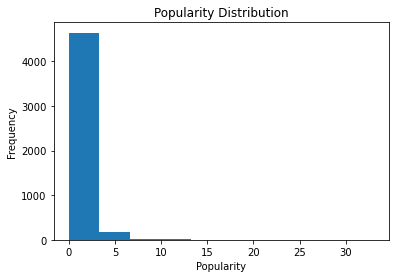

In [13]:
# popularity distribution
hist_plots(movies_df, "popularity", "Frequency");

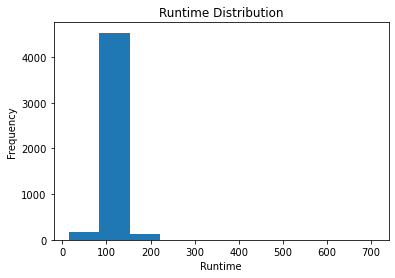

In [14]:
# runtime distribution
hist_plots(movies_df, "runtime", "Frequency");

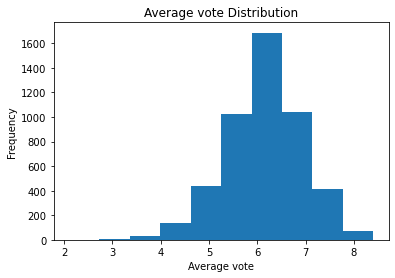

In [15]:
# average vote distribution
hist_plots(movies_df, "average vote", "Frequency");

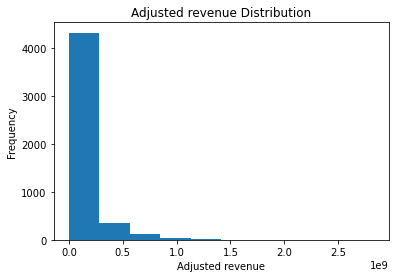

In [16]:
hist_plots(movies_df, "adjusted revenue", "Frequency");

From the above histograms, the feature ***popularity and adjusted revenue*** are left skwed. This reinforces our earlier discovery of outliers in these features. However, the ***runtime and average vote*** are approximately normally distributed as expected.

**Now let's evaluate the correlations between variables and also plot the scatter plots for the variables of interest.**

In [17]:
# getting the correlation coefficients of the features
movies_df.corr()

,id,popularity,budget,revenue,runtime,vote_count,average vote,release_year,budget_adj,adjusted revenue
id,1.000000,0.140275,-0.068388,-0.040843,-0.031101,0.069930,0.007712,0.506683,-0.145813,-0.115445
popularity,0.140275,1.000000,0.481101,0.629316,0.201249,0.788298,0.289021,0.170210,0.440051,0.561760
budget,-0.068388,0.481101,1.000000,0.703986,0.247158,0.585855,0.037417,0.237927,0.964006,0.560626
revenue,-0.040843,0.629316,0.703986,1.000000,0.237811,0.764122,0.206958,0.121289,0.674327,0.905011
runtime,-0.031101,0.201249,0.247158,0.237811,1.000000,0.252367,0.308205,-0.099556,0.304123,0.263979
vote_count,0.069930,0.788298,0.585855,0.764122,0.252367,1.000000,0.351330,0.196756,0.533281,0.666509
average vote,0.007712,0.289021,0.037417,0.206958,0.308205,0.351330,1.000000,-0.095035,0.049115,0.242429
release_year,0.506683,0.170210,0.237927,0.121289,-0.099556,0.196756,-0.095035,1.000000,0.083282,-0.099530
budget_adj,-0.145813,0.440051,0.964006,0.674327,0.304123,0.533281,0.049115,0.083282,1.000000,0.593273
adjusted revenue,-0.115445,0.561760,0.560626,0.905011,0.263979,0.666509,0.242429,-0.099530,0.593273,1.000000


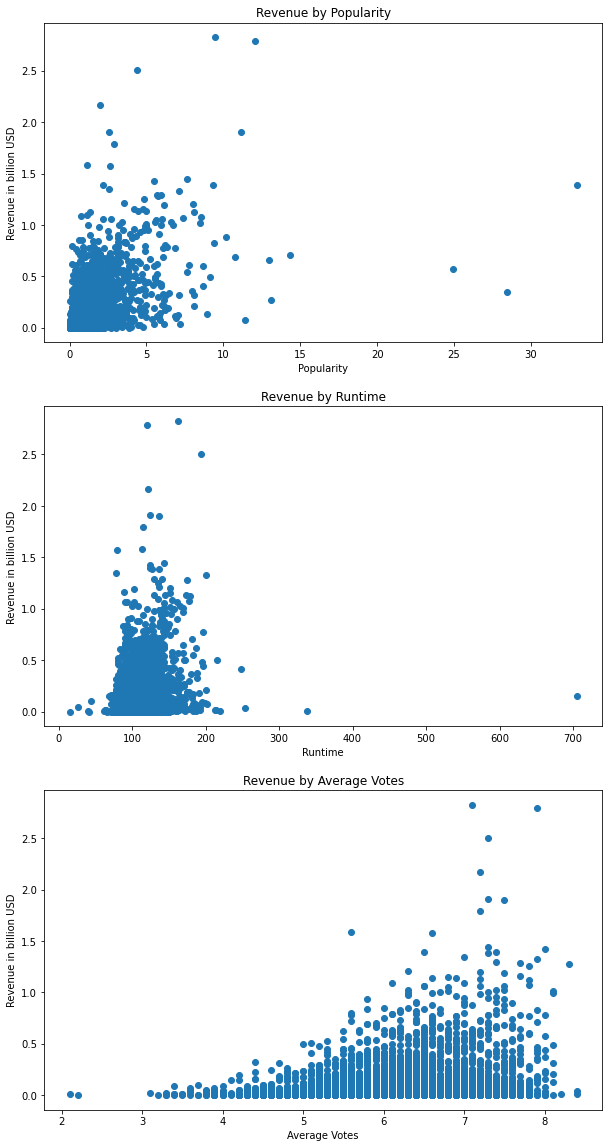

In [19]:
# plotting the scatter plots for popularity, runtime, average votes against revenue adjusted

fig, ax = plt.subplots(3, figsize=(10, 20))
ax[0].scatter(x = movies_df['popularity'], y = movies_df['adjusted revenue']/1e9)
ax[0].set_xlabel("Popularity")
ax[0].set_ylabel("Revenue in billion USD")
ax[0].set_title('Revenue by Popularity')

ax[1].scatter(x = movies_df['runtime'], y = movies_df['adjusted revenue']/1e9)
ax[1].set_xlabel("Runtime")
ax[1].set_ylabel("Revenue in billion USD")
ax[1].set_title('Revenue by Runtime')

ax[2].scatter(x = movies_df['average vote'], y = movies_df['adjusted revenue']/1e9)
ax[2].set_xlabel("Average Votes")
ax[2].set_ylabel("Revenue in billion USD")
ax[2].set_title('Revenue by Average Votes')

plt.show()

From the correlation coefficents and scatter plots above, we can see that ***runtime and average votes*** have weak postive correlations with the ***adjusted revenue***. While there is moderate positive correlation between ***popularity*** and the ***adjusted revenue***.

### Question 2: What is the annual revenue trend of the movie industry?
To answer this there is a need to evaluate annual revenues and plotting the results in a time series chart. This will showcase the revenue trend over time.

In [20]:
# grouping and summing annual revenue of the industry
annual_revenue = movies_df.groupby('release_year')['adjusted revenue'].sum()

# changing the series to a dataframe
annual_revenue_df = pd.DataFrame(annual_revenue)

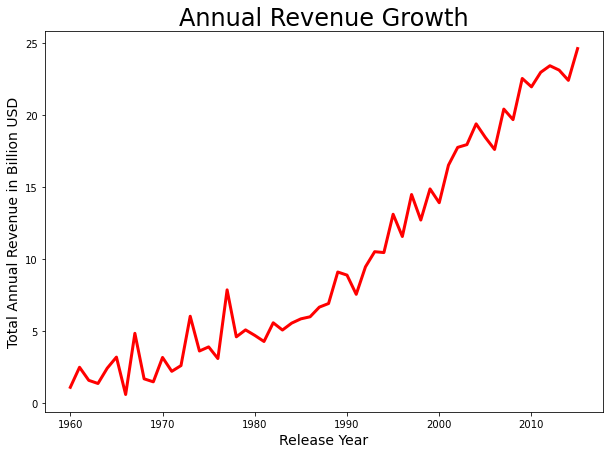

In [22]:
# plotting the line chart

plt.plot(annual_revenue_df/1e9, linewidth=3, color='red') # changing the scale to billion USD
plt.title('Annual Revenue Growth')
plt.xlabel('Release Year')
plt.ylabel('Total Annual Revenue in Billion USD')
plt.rcParams['figure.figsize'] = [10, 7]
plt.rc('axes', titlesize=24)                 # fontsize of the title
plt.rc('axes', labelsize=14)                 # fontsize of the x and y labels

The above line chart shows an increasing annual revenue trend over the years.

<a id='conclusions'></a>
## Conclusions
The analyses reveal a significant correlation between popularity and annual revenue generation in the movie industry. The moderate positive correlation indicates that movies with higher popularity tend to generate higher revenue. This suggests that audience preferences and engagement play a crucial role in driving revenue.

Furthermore, the line chart depicting the annual revenue trend illustrates the overall growth of the movie industry over time. While there may be occasional dips in revenue, the chart demonstrates a consistent upward trajectory. This indicates that despite temporary declines, the industry has experienced substantial growth, evolving into a lucrative market for investors.

Notably, the data showcases a remarkable increase in revenue from 950 million USD in 1960 to an impressive 24 billion USD in 2015. This significant growth reinforces the notion that the movie industry holds immense potential for generating substantial returns on investment.

Considering the positive correlation between popularity and revenue, coupled with the consistent growth observed in the industry over the years, it becomes evident that investing in the movie industry can be a promising opportunity. The data supports the notion that the movie industry offers a favorable environment for investment, making it an attractive choice for prospective investors seeking potential financial success.

**Limitation**
The aggregation of annual revenue of the industry is limited because a movie produced in a particular year may continue to generate revenue in the subsequent years and there are no metrics to update such data values.

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

## References

- <a href="https://docs.google.com/document/d/e/2PACX-1vTlVmknRRnfy_4eTrjw5hYGaiQim5ctr9naaRd4V9du2B5bxpd8FEH3KtDgp8qVekw7Cj1GLk1IXdZi/pub
">Investigate a Dataset</a>

- <a href="https://www.themoviedb.org/about">The Movie Database</a>

- <a href="https://dictionary.cambridge.org/dictionary/english/cast#:~:text=cast%20noun%20%28ACTORS%29%20B2%20%5B%20C%2C%20%2B%20sing%2Fpl,actors%20who%20were%20not%20playing%20the%20main%20parts%29. ">Cambridge Dictionary</a>

- <a href="https://www.merriam-webster.com/dictionary/running%20time#:~:text=Definition%20of%20running%20time%20%3A%20the%20duration%20of,recording%20Examples%20of%20running%20time%20in%20a%20Sentence
">Merriam Webster Dictionary</a>
- <a href="https://www.studiobinder.com/blog/movie-genres-list/">Studio Binder, Ultimate Guide to Movie Genres</a>

- <a href="https://www.investopedia.com/articles/investing/091615/movie-vs-tv-industry-which-most-profitable.asp">Investopedia, Movie vs. TV Industry: Which Is More Profitable?</a>

 


    